In [64]:
import db_functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sql_field
import json

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# read db_name from config file

with open("dbconfig.json", "w") as cfgfile:
    db_name = json.load(cfgfile)

dbf = db_functions.MyFunctions(db_name)

In [39]:
# Get videos from db

videos = dbf.get_videos()
videos

,id,title,duration,url,duration_good,duration_bad,percentage_of_good_subs,polarity(PatternAnalyzer),subjectivity(PatternAnalyzer),polarity(NaiveBayes),polarity_mean
0,9_HrC6nKJUQ,adorable couple | a mickey mouse cartoon | dis...,https://www.youtube.com/watch?v=9_HrC6nKJUQ,231.0,189.756,11.746,0.941708,0.622858,0.584882,1.000000,0.811429
1,bElcEMabhoU,potatoland | a mickey mouse cartoon | disney s...,https://www.youtube.com/watch?v=bElcEMabhoU,441.0,249.652,23.758,0.913105,0.631082,0.581586,1.000000,0.815541
2,dwF3e78j7pw,mickey mouse shorts - potatoland | official di...,https://www.youtube.com/watch?v=dwF3e78j7pw,418.0,490.334,71.280,0.873080,0.629766,0.586465,1.000000,0.814883
3,G-pqP_9r55E,new shoes | a mickey mouse cartoon | disney sh...,https://www.youtube.com/watch?v=G-pqP_9r55E,436.0,228.720,99.160,0.697572,0.639402,0.569966,1.000000,0.819701
4,iNT8T58G3f4,wonders of the deep | a mickey mouse cartoon |...,https://www.youtube.com/watch?v=iNT8T58G3f4,436.0,485.484,0.000,1.000000,0.633384,0.523721,0.000281,0.316833
5,KTJQdbvCMag,gone to pieces | a mickey mouse cartoon | disn...,https://www.youtube.com/watch?v=KTJQdbvCMag,227.0,85.180,55.520,0.605402,0.645858,0.632407,0.503490,0.574674
6,Nr6V25b9Eaw,mickey mouse works s01e01 english,https://www.youtube.com/watch?v=Nr6V25b9Eaw,1370.0,870.527,480.476,0.644356,0.623241,0.564708,1.000000,0.811621
7,Rq1xaWi6fA0,mickey mouse shorts - no,https://www.youtube.com/watch?v=Rq1xaWi6fA0,217.0,99.868,0.000,1.000000,0.640122,0.568556,1.000000,0.820061
8,tR9Gj_WGyqU,mickey mouse clubhouse | 'mickey and donald ha...,https://www.youtube.com/watch?v=tR9Gj_WGyqU,248.0,164.822,72.965,0.693150,0.628017,0.584865,1.000000,0.814009
9,TtJuMy_fTY0,mickey's breakfast blast 🍳 | mickey mouse hot ...,https://www.youtube.com/watch?v=TtJuMy_fTY0,136.0,202.709,14.538,0.933081,0.626409,0.584241,1.000000,0.813204


In [40]:
# Get video stats from db

videos = dbf.get_videos()

video_stats = dbf.get_video_stats()

video_stats = video_stats.sort_values(by=['id', 'timestamp'], ascending=True)
print(f"Video records count: {video_stats.shape[0]}")
video_stats.head()

Video records count: 816


,id,timestamp,views,likes,dislikes
13,9_HrC6nKJUQ,2021-01-20 15:02:01,28157758,56487,8064
30,9_HrC6nKJUQ,2021-01-20 16:02:02,28157846,56488,8064
47,9_HrC6nKJUQ,2021-01-20 17:02:03,28157938,56489,8064
64,9_HrC6nKJUQ,2021-01-20 18:02:03,28157976,56491,8065
81,9_HrC6nKJUQ,2021-01-20 19:02:04,28158066,56492,8065


In [41]:
# stats about the last hour of the 48 hours

max_timestamps = video_stats.groupby(by="id").timestamp.max()
max_timestamps = pd.DataFrame(max_timestamps)

total_views_end = pd.merge(max_timestamps, video_stats,  how='left', left_on=['id','timestamp'], right_on = ['id','timestamp'])
print(f"Max timestamps count: {total_views_end.shape[0]}")
total_views_end

Max timestamps count: 17


,id,timestamp,views,likes,dislikes
0,9_HrC6nKJUQ,2021-01-22 14:02:35,28163024,56523,8066
1,G-pqP_9r55E,2021-01-22 14:02:35,38987356,104102,20127
2,GtDYEkXwzVk,2021-01-22 14:02:35,21691759,47921,12103
3,HdJTQQyZsNg,2021-01-22 14:02:35,12690822,55474,6836
4,NWiGFCAFuHU,2021-01-22 14:02:35,19015008,57280,10978
5,Rq1xaWi6fA0,2021-01-22 14:02:35,2950930,5012,857
6,TtJuMy_fTY0,2021-01-22 14:02:35,1841455,3661,1921
7,VQoFM4hzhNY,2021-01-22 14:02:35,53,1,0
8,W18nAXue7hM,2021-01-22 14:02:35,16003188,97957,20684
9,XeRYuMEM_4k,2021-01-22 14:02:35,48627305,109343,22807


In [42]:
# calculate the differences of views, likes, dislikes between every two successive hours

hourly_stats_differences = pd.DataFrame()
hourly_stats_differences["id"] = video_stats["id"]
hourly_stats_differences["timestamp"] = video_stats["timestamp"]
hourly_stats_differences["likes_diff"] = pd.to_numeric(video_stats.groupby(by="id")['likes'].diff().dropna())

hourly_stats_differences['views_diff'] = pd.to_numeric(video_stats.groupby(by="id")['views'].diff())
hourly_stats_differences = hourly_stats_differences[hourly_stats_differences.views_diff != 0]
hourly_stats_differences = hourly_stats_differences.dropna()

hourly_stats_differences['dislikes_diff'] = pd.to_numeric(video_stats.groupby(by="id")['dislikes'].diff())
hourly_stats_differences = hourly_stats_differences[hourly_stats_differences.dislikes_diff != 0]
hourly_stats_differences = hourly_stats_differences.dropna()

hourly_stats_differences['p'] = hourly_stats_differences.likes_diff/hourly_stats_differences.dislikes_diff
hourly_stats_differences['LPV'] = hourly_stats_differences.likes_diff/hourly_stats_differences.views_diff
hourly_stats_differences['DPV'] = hourly_stats_differences.dislikes_diff/hourly_stats_differences.views_diff

print(f"Records count: {hourly_stats_differences.shape[0]}")
hourly_stats_differences.head()

Records count: 335


,id,timestamp,likes_diff,views_diff,dislikes_diff,p,LPV,DPV
64,9_HrC6nKJUQ,2021-01-20 18:02:03,2.0,38.0,1.0,2.0,0.052632,0.026316
98,9_HrC6nKJUQ,2021-01-20 20:02:05,1.0,117.0,1.0,1.0,0.008547,0.008547
489,9_HrC6nKJUQ,2021-01-21 19:02:21,2.0,61.0,1.0,2.0,0.032787,0.016393
591,9_HrC6nKJUQ,2021-01-22 01:02:26,1.0,158.0,-1.0,-1.0,0.006329,-0.006329
86,G-pqP_9r55E,2021-01-20 20:02:05,3.0,470.0,1.0,3.0,0.006383,0.002128


In [43]:
# calculate the daily differences views, likes, dislikes

daily_views_df = pd.DataFrame(hourly_stats_differences.groupby('id').views_diff.sum())
daily_views_df
daily_views_df['VPD'] = daily_views_df.views_diff / 2
daily_views_df = daily_views_df.rename(columns={"views_diff": "daily_views_diff"})
daily_views_df.reset_index(inplace=True)
daily_views_df

,id,daily_views_diff,VPD
0,9_HrC6nKJUQ,374.0,187.0
1,G-pqP_9r55E,4502.0,2251.0
2,GtDYEkXwzVk,2205.0,1102.5
3,HdJTQQyZsNg,15943.0,7971.5
4,NWiGFCAFuHU,14216.0,7108.0
5,Rq1xaWi6fA0,44.0,22.0
6,TtJuMy_fTY0,99437.0,49718.5
7,W18nAXue7hM,15897.0,7948.5
8,XeRYuMEM_4k,63443.0,31721.5
9,Z34MJIVqHq0,43034.0,21517.0


In [44]:
# calculate the indicators

deiktes_df = pd.DataFrame(hourly_stats_differences.groupby('id')[['p','LPV','DPV','views_diff']].mean())

deiktes_df.reset_index(inplace=True)
deiktes_df

,id,p,LPV,DPV,views_diff
0,9_HrC6nKJUQ,1.000000,0.025074,0.011232,93.500000
1,G-pqP_9r55E,1.000000,0.006247,0.001543,450.200000
2,GtDYEkXwzVk,0.250000,0.000320,0.004240,275.625000
3,HdJTQQyZsNg,1.942029,0.004436,0.002817,693.173913
4,NWiGFCAFuHU,1.061404,0.001925,0.001936,748.210526
5,Rq1xaWi6fA0,0.500000,0.019231,0.047009,22.000000
6,TtJuMy_fTY0,1.899008,0.002261,0.001382,2367.547619
7,W18nAXue7hM,2.094203,0.005047,0.002104,691.173913
8,XeRYuMEM_4k,3.077236,0.003604,0.001267,1547.390244
9,Z34MJIVqHq0,1.385204,0.003035,0.002560,1024.619048


In [76]:
# calculate the total stats at the last hour of the 48

total_views_end = pd.merge(total_views_end, deiktes_df,  how='left', left_on=['id'], right_on = ['id'])
total_views_end

total_views_end["r"] = 183 * total_views_end.views_diff / total_views_end.views
total_views_end = total_views_end.dropna()
total_views_end

,id,timestamp,views,likes,dislikes,p_x,LPV_x,DPV_x,views_diff_x,r,p_y,LPV_y,DPV_y,views_diff_y,p,LPV,DPV,views_diff
0,9_HrC6nKJUQ,2021-01-22 14:02:35,28163024,56523,8066,1.000000,0.025074,0.011232,93.500000,0.000607552,1.000000,0.025074,0.011232,93.500000,1.000000,0.025074,0.011232,93.500000
1,G-pqP_9r55E,2021-01-22 14:02:35,38987356,104102,20127,1.000000,0.006247,0.001543,450.200000,0.00211316,1.000000,0.006247,0.001543,450.200000,1.000000,0.006247,0.001543,450.200000
2,GtDYEkXwzVk,2021-01-22 14:02:35,21691759,47921,12103,0.250000,0.000320,0.004240,275.625000,0.00232528,0.250000,0.000320,0.004240,275.625000,0.250000,0.000320,0.004240,275.625000
3,HdJTQQyZsNg,2021-01-22 14:02:35,12690822,55474,6836,1.942029,0.004436,0.002817,693.173913,0.00999548,1.942029,0.004436,0.002817,693.173913,1.942029,0.004436,0.002817,693.173913
4,NWiGFCAFuHU,2021-01-22 14:02:35,19015008,57280,10978,1.061404,0.001925,0.001936,748.210526,0.00720076,1.061404,0.001925,0.001936,748.210526,1.061404,0.001925,0.001936,748.210526
5,Rq1xaWi6fA0,2021-01-22 14:02:35,2950930,5012,857,0.500000,0.019231,0.047009,22.000000,0.00136432,0.500000,0.019231,0.047009,22.000000,0.500000,0.019231,0.047009,22.000000
6,TtJuMy_fTY0,2021-01-22 14:02:35,1841455,3661,1921,1.899008,0.002261,0.001382,2367.547619,0.235282,1.899008,0.002261,0.001382,2367.547619,1.899008,0.002261,0.001382,2367.547619
8,W18nAXue7hM,2021-01-22 14:02:35,16003188,97957,20684,2.094203,0.005047,0.002104,691.173913,0.00790373,2.094203,0.005047,0.002104,691.173913,2.094203,0.005047,0.002104,691.173913
9,XeRYuMEM_4k,2021-01-22 14:02:35,48627305,109343,22807,3.077236,0.003604,0.001267,1547.390244,0.00582332,3.077236,0.003604,0.001267,1547.390244,3.077236,0.003604,0.001267,1547.390244
10,Z34MJIVqHq0,2021-01-22 14:02:35,8003199,17880,10977,1.385204,0.003035,0.002560,1024.619048,0.0234288,1.385204,0.003035,0.002560,1024.619048,1.385204,0.003035,0.002560,1024.619048


In [77]:
videos_with_indicators = videos.merge(deiktes_df, on="id", right_index=True)
videos_with_indicators
result = pd.concat([total_views_end["r"], videos_with_indicators], axis=1, join="inner")
result
videos_details_df = pd.concat([daily_views_df['VPD'], result], axis=1, join="inner")
videos_details_df
videos_details_df = videos_details_df.rename(columns={"polarity_mean": "polarity_mean(ci)"})
videos_details_df

,VPD,r,id,title,duration,url,duration_good,duration_bad,percentage_of_good_subs,polarity(PatternAnalyzer),subjectivity(PatternAnalyzer),polarity(NaiveBayes),polarity_mean(ci),p,LPV,DPV,views_diff
0,187.0,0.000607552,9_HrC6nKJUQ,adorable couple | a mickey mouse cartoon | dis...,https://www.youtube.com/watch?v=9_HrC6nKJUQ,231.0,189.756,11.746,0.941708,0.622858,0.584882,1.000000,0.811429,1.000000,0.025074,0.011232,93.500000
1,2251.0,0.00211316,bElcEMabhoU,potatoland | a mickey mouse cartoon | disney s...,https://www.youtube.com/watch?v=bElcEMabhoU,441.0,249.652,23.758,0.913105,0.631082,0.581586,1.000000,0.815541,0.500000,0.002538,0.009642,123.000000
2,1102.5,0.00232528,dwF3e78j7pw,mickey mouse shorts - potatoland | official di...,https://www.youtube.com/watch?v=dwF3e78j7pw,418.0,490.334,71.280,0.873080,0.629766,0.586465,1.000000,0.814883,2.149510,0.002896,0.001443,1275.588235
3,7971.5,0.00999548,G-pqP_9r55E,new shoes | a mickey mouse cartoon | disney sh...,https://www.youtube.com/watch?v=G-pqP_9r55E,436.0,228.720,99.160,0.697572,0.639402,0.569966,1.000000,0.819701,1.000000,0.006247,0.001543,450.200000
4,7108.0,0.00720076,iNT8T58G3f4,wonders of the deep | a mickey mouse cartoon |...,https://www.youtube.com/watch?v=iNT8T58G3f4,436.0,485.484,0.000,1.000000,0.633384,0.523721,0.000281,0.316833,0.333333,0.000006,0.013895,85.333333
8,31721.5,0.00790373,tR9Gj_WGyqU,mickey mouse clubhouse | 'mickey and donald ha...,https://www.youtube.com/watch?v=tR9Gj_WGyqU,248.0,164.822,72.965,0.693150,0.628017,0.584865,1.000000,0.814009,0.654167,0.003113,0.004703,560.888889
9,21517.0,0.00582332,TtJuMy_fTY0,mickey's breakfast blast 🍳 | mickey mouse hot ...,https://www.youtube.com/watch?v=TtJuMy_fTY0,136.0,202.709,14.538,0.933081,0.626409,0.584241,1.000000,0.813204,1.899008,0.002261,0.001382,2367.547619
11,21685.0,0.00193267,W18nAXue7hM,carried away | a mickey mouse cartoon | disney...,https://www.youtube.com/watch?v=W18nAXue7hM,227.0,147.670,39.260,0.789975,0.624597,0.571566,1.000000,0.812299,2.094203,0.005047,0.002104,691.173913
12,128.0,0.0164336,x6AcuhX4ZUU,over the moon | a mickey mouse cartoon | disne...,https://www.youtube.com/watch?v=x6AcuhX4ZUU,226.0,113.350,54.020,0.677242,0.629259,0.572586,1.000000,0.814629,0.500000,0.005113,0.007960,150.250000
13,10096.0,0.000154339,XeRYuMEM_4k,no | a mickey mouse cartoon | disney shorts,https://www.youtube.com/watch?v=XeRYuMEM_4k,226.0,171.879,63.118,0.731409,0.648472,0.575952,0.008089,0.328280,3.077236,0.003604,0.001267,1547.390244


In [78]:
# Create DataFrame about normalized Indicators with zscore 

ind_zscore_df = pd.DataFrame()
ind_zscore_df['id'] = videos_details_df['id']
ind_zscore_df['zscore_p'] = (videos_details_df["p"] - videos_details_df["p"].mean())/videos_details_df["p"].std(ddof=0)
ind_zscore_df['zscore_r'] = (videos_details_df["r"] - videos_details_df["r"].mean())/videos_details_df["r"].std(ddof=0)
ind_zscore_df['zscore_VPD'] = (videos_details_df["VPD"] - videos_details_df["VPD"].mean())/videos_details_df["VPD"].std(ddof=0)
ind_zscore_df['zscore_LPV'] = (videos_details_df["LPV"] - videos_details_df["LPV"].mean())/videos_details_df["LPV"].std(ddof=0)
ind_zscore_df['zscore_DPV'] = (videos_details_df["DPV"] - videos_details_df["DPV"].mean())/videos_details_df["DPV"].std(ddof=0)
ind_zscore_df['zscore_polarity_mean(ci)'] = (videos_details_df["polarity_mean(ci)"] - videos_details_df["polarity_mean(ci)"].mean())/videos_details_df["polarity_mean(ci)"].std(ddof=0)
ind_zscore_df

,id,zscore_p,zscore_r,zscore_VPD,zscore_LPV,zscore_DPV,zscore_polarity_mean(ci)
0,9_HrC6nKJUQ,-0.328366,-1.03198,-0.978741,3.213717,1.449758,0.433624
1,bElcEMabhoU,-0.936735,-0.694527,-0.787723,-0.419171,1.081681,0.456076
2,dwF3e78j7pw,1.070285,-0.646985,-0.894014,-0.361395,-0.816883,0.452484
3,G-pqP_9r55E,-0.328366,1.07214,-0.258304,0.178655,-0.793693,0.478791
4,iNT8T58G3f4,-1.139524,0.445761,-0.338219,-0.827316,2.066459,-2.266934
8,tR9Gj_WGyqU,-0.749154,0.603317,1.939702,-0.326558,-0.062059,0.447712
9,TtJuMy_fTY0,0.765490,0.137034,0.995300,-0.463769,-0.831011,0.443316
11,W18nAXue7hM,1.002991,-0.73498,1.010848,-0.014711,-0.663819,0.438375
12,x6AcuhX4ZUU,-0.936735,2.51512,-0.984202,-0.004146,0.692112,0.451097
13,XeRYuMEM_4k,2.199083,-1.13356,-0.061687,-0.247351,-0.857593,-2.204432


<AxesSubplot:>

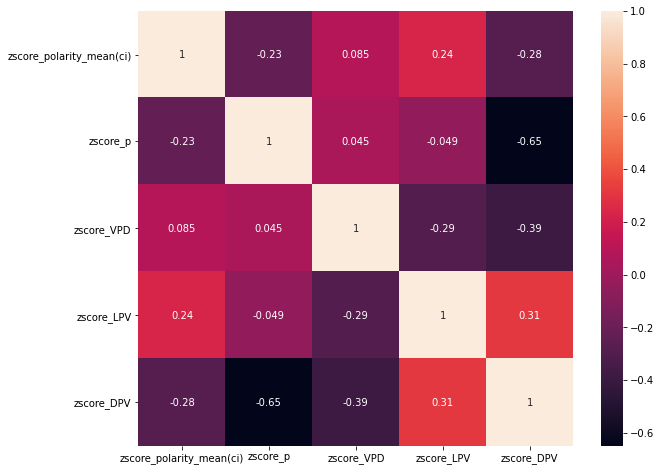

In [79]:
# CORRELATION MATRIX z score - indicators

corr = ind_zscore_df[["zscore_polarity_mean(ci)", "zscore_r", "zscore_p", "zscore_VPD", "zscore_LPV", "zscore_DPV"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, square=True)

In [80]:
# proccessing in order to create sorted a DataFrame by polarity(ci)

sorted_by_ci_df = videos_details_df.sort_values(by=['polarity_mean(ci)'])
sorted_by_ci_df.reset_index(inplace=True, drop=True)

selected_sorted = sorted_by_ci_df.head(3)
selected_sorted_df = selected_sorted.append(sorted_by_ci_df.tail(3))
selected_sorted_df.reset_index(inplace=True, drop=True)
selected_sorted_df

,VPD,r,id,title,duration,url,duration_good,duration_bad,percentage_of_good_subs,polarity(PatternAnalyzer),subjectivity(PatternAnalyzer),polarity(NaiveBayes),polarity_mean(ci),p,LPV,DPV,views_diff
0,7108.0,0.00720076,iNT8T58G3f4,wonders of the deep | a mickey mouse cartoon |...,https://www.youtube.com/watch?v=iNT8T58G3f4,436.0,485.484,0.000,1.000000,0.633384,0.523721,0.000281,0.316833,0.333333,0.000006,0.013895,85.333333
1,10096.0,0.000154339,XeRYuMEM_4k,no | a mickey mouse cartoon | disney shorts,https://www.youtube.com/watch?v=XeRYuMEM_4k,226.0,171.879,63.118,0.731409,0.648472,0.575952,0.008089,0.328280,3.077236,0.003604,0.001267,1547.390244
2,25082.5,0.00435641,zLFG2ZFVeWs,mickey mouse clubhouse - episode 97 | official...,https://www.youtube.com/watch?v=zLFG2ZFVeWs,268.0,409.981,26.450,0.939395,0.617669,0.558880,1.000000,0.808835,0.645833,0.002726,0.001918,1254.125000
3,1102.5,0.00232528,dwF3e78j7pw,mickey mouse shorts - potatoland | official di...,https://www.youtube.com/watch?v=dwF3e78j7pw,418.0,490.334,71.280,0.873080,0.629766,0.586465,1.000000,0.814883,2.149510,0.002896,0.001443,1275.588235
4,2251.0,0.00211316,bElcEMabhoU,potatoland | a mickey mouse cartoon | disney s...,https://www.youtube.com/watch?v=bElcEMabhoU,441.0,249.652,23.758,0.913105,0.631082,0.581586,1.000000,0.815541,0.500000,0.002538,0.009642,123.000000
5,7971.5,0.00999548,G-pqP_9r55E,new shoes | a mickey mouse cartoon | disney sh...,https://www.youtube.com/watch?v=G-pqP_9r55E,436.0,228.720,99.160,0.697572,0.639402,0.569966,1.000000,0.819701,1.000000,0.006247,0.001543,450.200000


In [81]:
# take the 3 top and 3 last videos about this sort we made

top3_videos = video_stats[video_stats.id.isin(selected_sorted_df.head(3).id)].reset_index(drop=True)
last3_videos = video_stats[video_stats.id.isin(selected_sorted_df.tail(3).id)].reset_index(drop=True)
top3_videos

,id,timestamp,views,likes,dislikes
0,XeRYuMEM_4k,2021-01-20 15:02:01,48554581,109109,22733
1,XeRYuMEM_4k,2021-01-20 16:02:02,48555297,109116,22734
2,XeRYuMEM_4k,2021-01-20 17:02:03,48556151,109118,22736
3,XeRYuMEM_4k,2021-01-20 18:02:03,48556907,109123,22735
4,XeRYuMEM_4k,2021-01-20 19:02:04,48558006,109126,22738
...,...,...,...,...,...
139,zLFG2ZFVeWs,2021-01-22 10:02:33,50673481,74447,44556
140,zLFG2ZFVeWs,2021-01-22 11:02:34,50674652,74449,44559
141,zLFG2ZFVeWs,2021-01-22 12:02:34,50676290,74454,44564
142,zLFG2ZFVeWs,2021-01-22 13:02:35,50677748,74461,44565


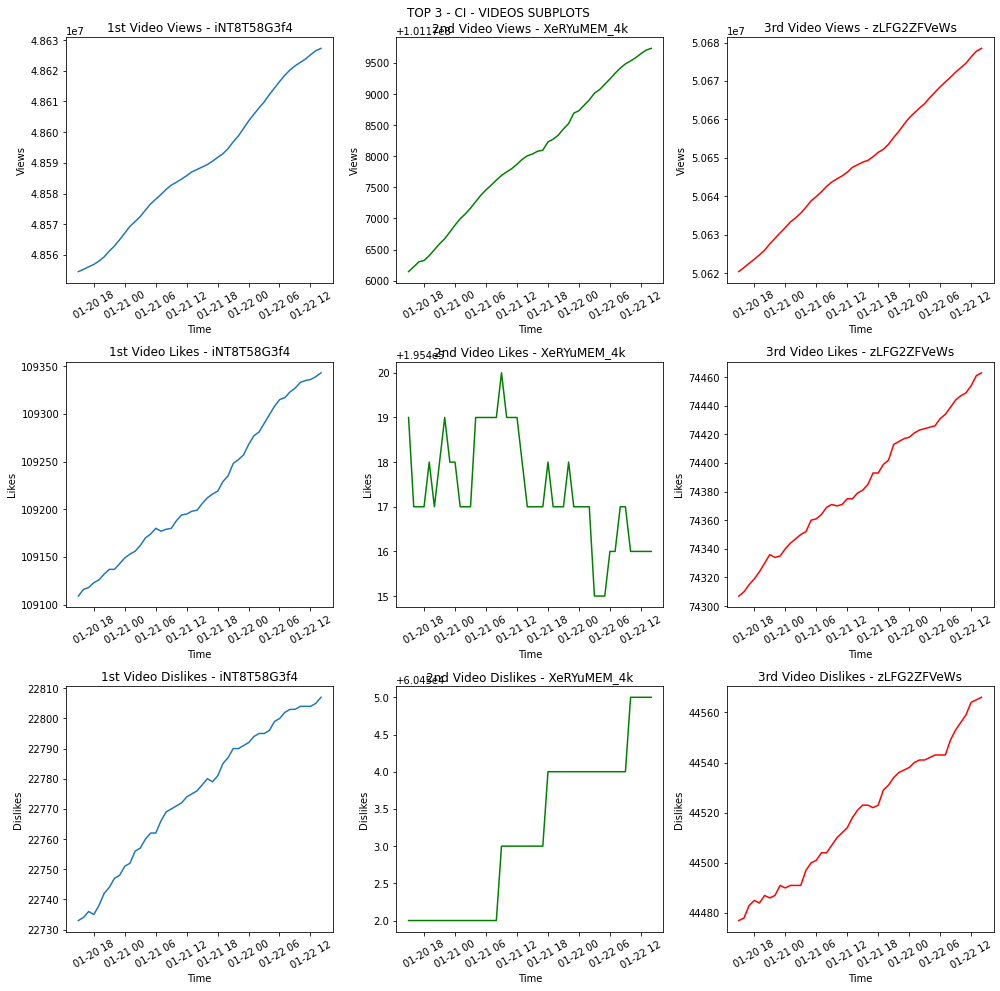

In [89]:
# PLOTS TOP 3 Videos

x1 = top3_videos.iloc[0:48]
x2 = top3_videos.iloc[48:96]
x3 = top3_videos.iloc[96:145]

plt.rcParams['figure.figsize'] = [14, 14]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
fig.suptitle('TOP 3 - CI - VIDEOS SUBPLOTS ')
plt.tight_layout()

ax1.plot(x1.timestamp, x1.views)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation = 30)
ax1.title.set_text(f'1st Video Views - {selected_sorted_df.id.values[0]}')
ax1.set(ylabel="Views",xlabel="Time")
plt.tight_layout()

ax2.plot(x2.timestamp, x2.views, color='green')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation = 30)
ax2.title.set_text(f'2nd Video Views - {selected_sorted_df.id.values[1]}')
ax2.set(ylabel="Views",xlabel="Time")
plt.tight_layout()

ax3.plot(x3.timestamp, x3.views, color='red')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation = 30)
ax3.title.set_text(f'3rd Video Views - {selected_sorted_df.id.values[2]}')
ax3.set(ylabel="Views",xlabel="Time")
plt.tight_layout()

ax4.plot(x1.timestamp, x1.likes)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation = 30)
ax4.title.set_text(f'1st Video Likes - {selected_sorted_df.id.values[0]}')
ax4.set(ylabel="Likes",xlabel="Time")
plt.tight_layout()

ax5.plot(x2.timestamp, x2.likes, color='green')
plt.setp(ax5.xaxis.get_majorticklabels(), rotation = 30)
ax5.title.set_text(f'2nd Video Likes - {selected_sorted_df.id.values[1]}')
ax5.set(ylabel="Likes",xlabel="Time")
plt.tight_layout()

ax6.plot(x3.timestamp, x3.likes, color='red')
plt.setp(ax6.xaxis.get_majorticklabels(), rotation = 30)
ax6.title.set_text(f'3rd Video Likes - {selected_sorted_df.id.values[2]}')
ax6.set(ylabel="Likes",xlabel="Time")
plt.tight_layout()

ax7.plot(x1.timestamp, x1.dislikes)
plt.setp(ax7.xaxis.get_majorticklabels(), rotation = 30)
ax7.title.set_text(f'1st Video Dislikes - {selected_sorted_df.id.values[0]}')
ax7.set(ylabel="Dislikes",xlabel="Time")
plt.tight_layout()

ax8.plot(x2.timestamp, x2.dislikes, color='green')
plt.setp(ax8.xaxis.get_majorticklabels(), rotation = 30)
ax8.title.set_text(f'2nd Video Dislikes - {selected_sorted_df.id.values[1]}')
ax8.set(ylabel="Dislikes",xlabel="Time")
plt.tight_layout()

ax9.plot(x3.timestamp, x3.dislikes, color='red')
plt.setp(ax9.xaxis.get_majorticklabels(), rotation = 30)
ax9.title.set_text(f'3rd Video Dislikes - {selected_sorted_df.id.values[2]}')
ax9.set(ylabel="Dislikes",xlabel="Time")
plt.tight_layout()

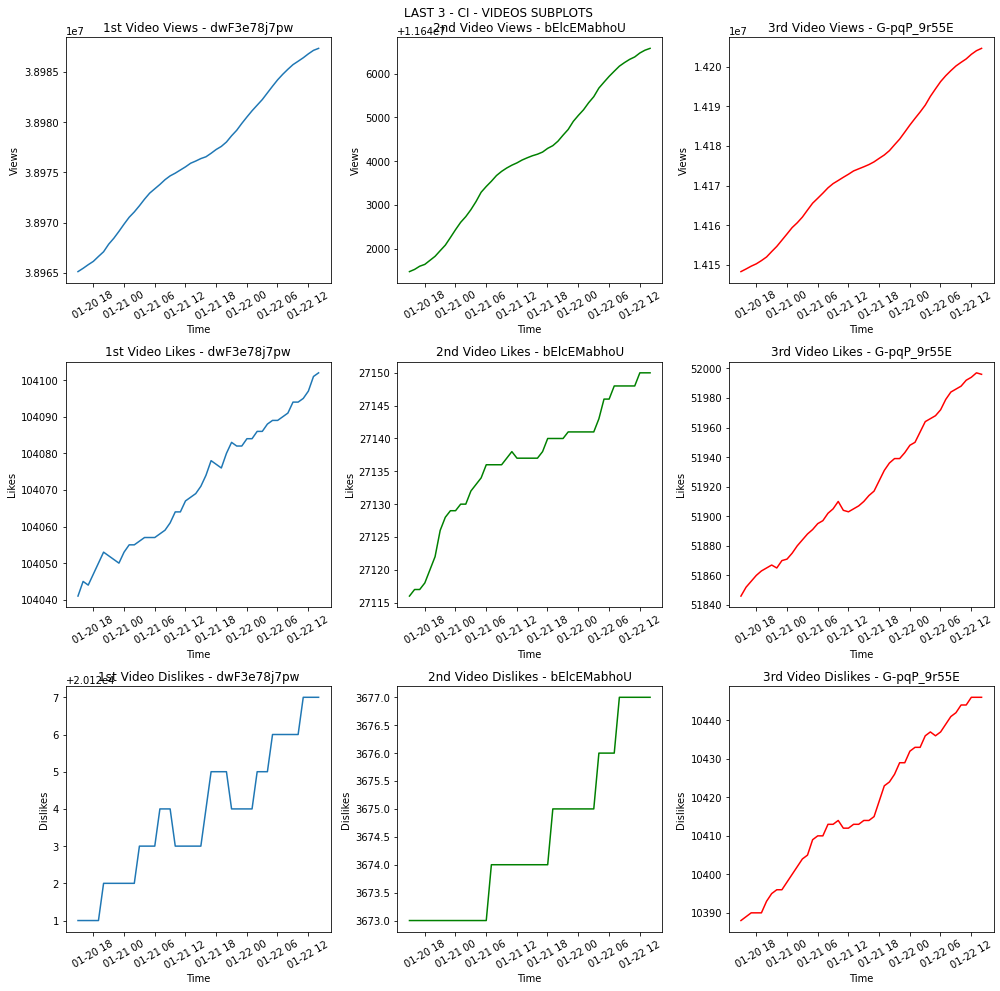

In [92]:
# PLOTS LAST 3 Videos

x1 = last3_videos.iloc[0:48]
x2 = last3_videos.iloc[48:96]
x3 = last3_videos.iloc[96:145]

plt.rcParams['figure.figsize'] = [14, 14]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
fig.suptitle('LAST 3 - CI - VIDEOS SUBPLOTS ')
plt.tight_layout()

ax1.plot(x1.timestamp, x1.views)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation = 30)
ax1.title.set_text(f'1st Video Views - {selected_sorted_df.id.values[3]}')
ax1.set(ylabel="Views",xlabel="Time")
plt.tight_layout()

ax2.plot(x2.timestamp, x2.views, color='green')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation = 30)
ax2.title.set_text(f'2nd Video Views - {selected_sorted_df.id.values[4]}')
ax2.set(ylabel="Views",xlabel="Time")
plt.tight_layout()

ax3.plot(x3.timestamp, x3.views, color='red')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation = 30)
ax3.title.set_text(f'3rd Video Views - {selected_sorted_df.id.values[5]}')
ax3.set(ylabel="Views",xlabel="Time")
plt.tight_layout()

ax4.plot(x1.timestamp, x1.likes)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation = 30)
ax4.title.set_text(f'1st Video Likes - {selected_sorted_df.id.values[3]}')
ax4.set(ylabel="Likes",xlabel="Time")
plt.tight_layout()

ax5.plot(x2.timestamp, x2.likes, color='green')
plt.setp(ax5.xaxis.get_majorticklabels(), rotation = 30)
ax5.title.set_text(f'2nd Video Likes - {selected_sorted_df.id.values[4]}')
ax5.set(ylabel="Likes",xlabel="Time")
plt.tight_layout()

ax6.plot(x3.timestamp, x3.likes, color='red')
plt.setp(ax6.xaxis.get_majorticklabels(), rotation = 30)
ax6.title.set_text(f'3rd Video Likes - {selected_sorted_df.id.values[5]}')
ax6.set(ylabel="Likes",xlabel="Time")
plt.tight_layout()

ax7.plot(x1.timestamp, x1.dislikes)
plt.setp(ax7.xaxis.get_majorticklabels(), rotation = 30)
ax7.title.set_text(f'1st Video Dislikes - {selected_sorted_df.id.values[3]}')
ax7.set(ylabel="Dislikes",xlabel="Time")
plt.tight_layout()

ax8.plot(x2.timestamp, x2.dislikes, color='green')
plt.setp(ax8.xaxis.get_majorticklabels(), rotation = 30)
ax8.title.set_text(f'2nd Video Dislikes - {selected_sorted_df.id.values[4]}')
ax8.set(ylabel="Dislikes",xlabel="Time")
plt.tight_layout()

ax9.plot(x3.timestamp, x3.dislikes, color='red')
plt.setp(ax9.xaxis.get_majorticklabels(), rotation = 30)
ax9.title.set_text(f'3rd Video Dislikes - {selected_sorted_df.id.values[5]}')
ax9.set(ylabel="Dislikes",xlabel="Time")
plt.tight_layout()

In [87]:
# create table yoytube_video_ndicators

table_name = 'youtube_video_indicators' 
id = sql_field.Field('id', 'varchar(20) primary key not null')
zscore_p = sql_field.Field('zscore_p', 'float')
zscore_r = sql_field.Field('zscore_r', 'float')
zscore_VPD = sql_field.Field('zscore_VPD', 'float')
zscore_LPV = sql_field.Field('zscore_LPV', 'float')
zscore_DPV = sql_field.Field('zscore_DPV', 'float')
zscore_polarity_mean_ci = sql_field.Field('zscore_polarity_mean_ci', 'float')

dbf.create_table(table_name, id, zscore_p, zscore_r, zscore_VPD, zscore_LPV, zscore_DPV, zscore_polarity_mean_ci)


In [88]:
# insert yoytube video ndicators into db

dbf.insert_youtube_indicators(ind_zscore_df)

INSERT INTO youtube_video_indicators (id,zscore_p,zscore_r,zscore_VPD,zscore_LPV,zscore_DPV,zscore_polarity_mean_ci) VALUES ("9_HrC6nKJUQ",-0.32836624021339705,-1.0319800079852002,-0.9787414049159057,3.2137171584017303,1.449758255031576,0.4336244370414084);
INSERT INTO youtube_video_indicators (id,zscore_p,zscore_r,zscore_VPD,zscore_LPV,zscore_DPV,zscore_polarity_mean_ci) VALUES ("bElcEMabhoU",-0.9367346815171586,-0.694526538876545,-0.7877230794797999,-0.41917141547981407,1.0816808293925244,0.45607649278693074);
INSERT INTO youtube_video_indicators (id,zscore_p,zscore_r,zscore_VPD,zscore_LPV,zscore_DPV,zscore_polarity_mean_ci) VALUES ("dwF3e78j7pw",1.0702847351369171,-0.6469847801497091,-0.8940140420589507,-0.3613948441740302,-0.8168833137144291,0.45248372705722445);
INSERT INTO youtube_video_indicators (id,zscore_p,zscore_r,zscore_VPD,zscore_LPV,zscore_DPV,zscore_polarity_mean_ci) VALUES ("G-pqP_9r55E",-0.32836624021339705,1.0721425034951677,-0.25830431462648457,0.1786552430935847,-0.

12